In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Table cleaning

In [3]:
data = pd.read_csv('/home/maligina/data/test_split_fluor.csv')
data = data.rename(columns={'Absorption max (nm)' : 'Absorption_max_nm', "Emission max (nm)": "Emission_max_nm", "Quantum yield": "Quantum_yield", 'Stokes shift':'Stokes_shift'})
print('pearson =', data['Absorption_max_nm'].corr(data['Emission_max_nm']))
print('spearman =', data['Absorption_max_nm'].corr(data['Emission_max_nm'], method = 'spearman'))

(1850, 16)

In [3]:
data[['Absorption_max_nm', 'Emission_max_nm', 'Quantum_yield', 'Stokes_shift', 'Lifetime (ns)', 'Molecular weight (g mol-1)']].corr(method = 'spearman')

,Absorption_max_nm,Emission_max_nm,Quantum_yield,Stokes_shift,Lifetime (ns),Molecular weight (g mol-1)
Absorption_max_nm,1.000000,0.839763,0.102745,-0.286138,0.092630,0.379503
Emission_max_nm,0.839763,1.000000,-0.019944,0.192375,0.085671,0.345764
Quantum_yield,0.102745,-0.019944,1.000000,-0.196689,0.340093,0.171795
Stokes_shift,-0.286138,0.192375,-0.196689,1.000000,-0.012105,-0.106566
Lifetime (ns),0.092630,0.085671,0.340093,-0.012105,1.000000,-0.064394
Molecular weight (g mol-1),0.379503,0.345764,0.171795,-0.106566,-0.064394,1.000000


In [4]:
data.head(3)

,Unnamed: 0,Tag,Chromophore,Solvent,Absorption_max_nm,Emission_max_nm,Lifetime (ns),Quantum_yield,log(e/mol-1 dm3 cm-1),abs FWHM (cm-1),emi FWHM (cm-1),abs FWHM (nm),emi FWHM (nm),Molecular weight (g mol-1),Reference,Stokes_shift
0,14307,14308,CC[C@H](C)COc1ccc(C2=C3C(C)=C(I)C(C)=[N+]3[B-]...,ClCCl,532.0,557.0,NaN,0.06,NaN,NaN,NaN,NaN,NaN,662.09838,https://doi.org/10.1016/j.inoche.2015.10.029,25.0
1,7421,7422,CN(C)c1ccc(C2=Nc3sc4cc(C(F)(F)F)ccc4[n+]3[B-](...,ClCCl,431.0,478.0,NaN,1.00,NaN,NaN,NaN,42.7,46.6,413.17722,DOI: 10.1021/acs.joc.8b02098,47.0
2,20037,20038,CCCCCCOc1cc(/C=C/c2cc(OCCCCCC)c(/C=C/c3cc(OCCC...,ClCCl,518.0,624.0,1.89,0.13,4.9,NaN,NaN,NaN,NaN,1035.46260,DOI: 10.1021/ol1007263,106.0


In [5]:
print(data.isna().sum())

Unnamed: 0                       0
Tag                              0
Chromophore                      0
Solvent                          0
Absorption_max_nm              204
Emission_max_nm                175
Lifetime (ns)                 1173
Quantum_yield                  551
log(e/mol-1 dm3 cm-1)         1060
abs FWHM (cm-1)               1787
emi FWHM (cm-1)               1789
abs FWHM (nm)                 1497
emi FWHM (nm)                 1188
Molecular weight (g mol-1)       0
Reference                        0
Stokes_shift                   308
dtype: int64


In [6]:
data.shape

(1850, 16)

In [7]:
Q1 = data['Molecular weight (g mol-1)'].quantile(0.25)
Q3 = data['Molecular weight (g mol-1)'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for detecting outliers
lower_bound = Q1 - 1.5 * IQR #тут примерно 941.3
upper_bound = Q3 + 1.5 * IQR

outliers_iqr = data[(data['Molecular weight (g mol-1)'] < lower_bound) | (data['Molecular weight (g mol-1)'] > upper_bound)]
print(f"Number of outliers using IQR method: {len(outliers_iqr)}")

data = data[(data['Molecular weight (g mol-1)'] >= lower_bound) & (data['Molecular weight (g mol-1)'] <= upper_bound)]
data.shape

Number of outliers using IQR method: 87


(1763, 16)

In [8]:
data = data[data['Stokes_shift'] >= 0]
data.shape

(1465, 16)

In [9]:
data_dropped = data.dropna(subset=['Absorption_max_nm', 'Emission_max_nm', 'Quantum_yield']).reset_index(drop=True)
print(data_dropped.shape)
print(data_dropped.isna().sum())

(1115, 16)
Unnamed: 0                       0
Tag                              0
Chromophore                      0
Solvent                          0
Absorption_max_nm                0
Emission_max_nm                  0
Lifetime (ns)                  600
Quantum_yield                    0
log(e/mol-1 dm3 cm-1)          492
abs FWHM (cm-1)               1071
emi FWHM (cm-1)               1069
abs FWHM (nm)                  860
emi FWHM (nm)                  694
Molecular weight (g mol-1)       0
Reference                        0
Stokes_shift                     0
dtype: int64


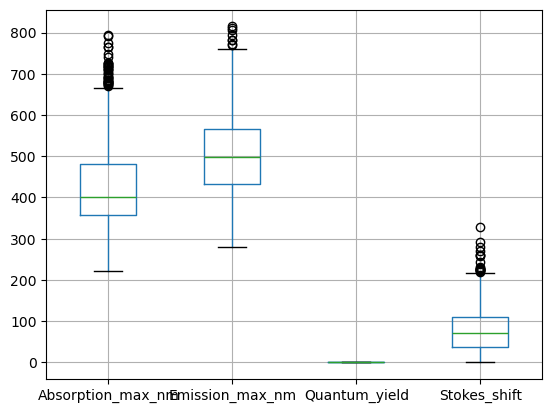

In [10]:
# data_dropped.hist(column=['Absorption_max_nm', 'Emission_max_nm', 'Quantum_yield', 'Stokes_shift'])
data_dropped.boxplot(column=['Absorption_max_nm', 'Emission_max_nm', 'Quantum_yield', 'Stokes_shift'])
plt.show()

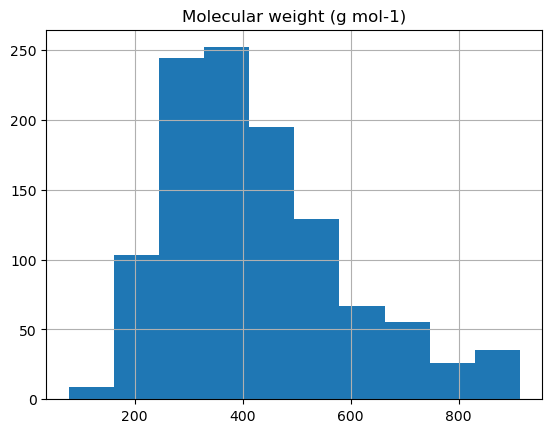

In [11]:
data_dropped.hist(column=['Molecular weight (g mol-1)'])
plt.show()

In [12]:
X = data_dropped[['Chromophore', 'Solvent']]
X.head(3)

,Chromophore,Solvent
0,CC[C@H](C)COc1ccc(C2=C3C(C)=C(I)C(C)=[N+]3[B-]...,ClCCl
1,CN(C)c1ccc(C2=Nc3sc4cc(C(F)(F)F)ccc4[n+]3[B-](...,ClCCl
2,CCN1C(=O)C(C2C(=O)c3c4ccccc4cc4cc5ccccc5c2c34)...,ClCCl


In [13]:
y = data_dropped[['Absorption_max_nm', 'Quantum_yield', 'Stokes_shift']]
y['Absorption_max_nm'] = np.log10(y['Absorption_max_nm'])
y.head(3)

/tmp/ipykernel_98780/297302290.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['Absorption_max_nm'] = np.log10(y['Absorption_max_nm'])


,Absorption_max_nm,Quantum_yield,Stokes_shift
0,2.725912,0.060,25.000000
1,2.634477,1.000,47.000000
2,2.725999,0.237,49.892586


In [14]:
# data_dropped.to_csv('/home/maligina/data/test_clean.csv')

# Database preparation

In [4]:
data_dropped = pd.read_csv('/home/maligina/data/test_clean.csv')
data_dropped.shape

(1115, 17)

In [16]:
from rdkit import Chem
from rdkit.Chem import AllChem
from ase import Atoms
from ase.db import connect
from rdkit.Chem import rdForceFieldHelpers

Iodine removal

In [11]:
# # Connect to the existing database
# db_old = connect('solvent.db')
# # Create a new database to store filtered molecules
# db_new = connect('filtered_solvent.db')

# # Iterate through the existing database
# for row in db_old.select():
#     atoms = row.toatoms()
    
#     # Check if iodine (atomic number 53) is present
#     if 53 not in atoms.get_atomic_numbers():
#         # Write the entry to the new database
#         db_new.write(atoms, key_value_pairs=row.key_value_pairs)
# print(len(db_new))

263


Basic generation of one conformer

In [19]:
def smiles_to_ase(smiles):
    mol = Chem.MolFromSmiles(smiles)
    mol = Chem.AddHs(mol)
    
    # Embed with multiple attempts to handle difficult molecules
    try:
        AllChem.EmbedMolecule(mol, maxAttempts=1000)
        # ff = rdForceFieldHelpers.UFFGetMoleculeForceField(mol)
        # print(f'Energy for {smiles} before: {ff.CalcEnergy()}')
        AllChem.UFFOptimizeMolecule(mol, maxIters=10000)
        # ff = rdForceFieldHelpers.UFFGetMoleculeForceField(mol)
        # print(f'Energy after: {ff.CalcEnergy()}')
    except ValueError as e:
        print(f"Failed to generate 3D conformer for SMILES: {smiles}, Error: {str(e)}")
        return None
    
    conformer = mol.GetConformer()
    positions = []
    symbols = []
    
    for atom in mol.GetAtoms():
        pos = conformer.GetAtomPosition(atom.GetIdx())
        positions.append((pos.x, pos.y, pos.z))
        symbols.append(atom.GetSymbol())
    
    return Atoms(symbols=symbols, positions=positions)

Fake code

In [49]:
stupid_smiles = ['[BH3-][P+]1(c2ccccc2)c2ccccc2-c2sc3ccccc3c21',
                 'c1ccc(-p2c3ccccc3c3sc4ccccc4c32)cc1',
                 'O=P1(c2ccccc2)c2ccccc2-c2sc3ccccc3c21',
                 'CCCCCCCCCCCCn1cccc1/C=C/c1ccc(OCCCC)c2c(/C=C/c3cccn3CCCCCCCCCCCC)ccc(OCCCC)c12',
                 'C[P+]1(c2ccccc2)c2ccccc2-c2sc3ccccc3c21',
                 'O=P1(c2ccccc2)C2=C(c3ccccc31)S(=O)(=O)c1ccccc12',
                 'C[P+]1(c2ccccc2)C2=C(c3ccccc31)S(=O)(=O)c1ccccc12',
                 'CCCCCC(=O)c1ccc2c3c(sc2c1)-c1ccccc1P3(=O)c1ccccc1',
                 'COCCOCCOCCNc1cc2c3c(c(NCCOCCOCCOC)cc4c3c1C(=O)N(CCOCCOCCOC)C4=O)C(=O)N(CCOCCOCCOC)C2=O',
                 'CCCCCCCCC1(CCCCCCCC)c2cc(-c3ccc([Si](C)(C)C)cc3)ccc2-c2ccc(-c3ccc([Si](C)(C)C)cc3)cc21',
                 'C(=C/c1cc(/C=C/c2ccc(N(c3ccccc3)c3ccccc3)cc2)nc(/C=C/c2ccc(N(c3ccccc3)c3ccccc3)cc2)n1)\c1ccc(N(c2ccccc2)c2ccccc2)cc1',
                 'CCCCCCCCCCCCCCCCOc1cc(C#Cc2ccc3ccccc3c2)c(OCCCCCCCCCCCCCCCC)cc1C#Cc1ccc(C=C(C#N)C#N)cc1']

db_stupid = connect('stupid.db')

# Iterate over chromophores
for smiles in stupid_smiles:
    stupid_ase = smiles_to_ase(smiles)

    if stupid_ase:
        db_stupid.write(stupid_ase, smiles=smiles)

<>:3: SyntaxWarning: invalid escape sequence '\c'
<>:7: SyntaxWarning: invalid escape sequence '\c'
<>:3: SyntaxWarning: invalid escape sequence '\c'
<>:7: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_85223/3879483094.py:3: SyntaxWarning: invalid escape sequence '\c'
  'C(=C/c1cc(/C=C/c2ccc(N(c3ccccc3)c3ccccc3)cc2)nc(/C=C/c2ccc(N(c3ccccc3)c3ccccc3)cc2)n1)\c1ccc(N(c2ccccc2)c2ccccc2)cc1',
/tmp/ipykernel_85223/3879483094.py:7: SyntaxWarning: invalid escape sequence '\c'
  'C(=C/c1cc(/C=C/c2ccc(-n3c4ccccc4c4ccccc43)cc2)cc(/C=C/c2ccc(-n3c4ccccc4c4ccccc43)cc2)c1)\c1ccc(-n2c3ccccc3c3ccccc32)cc1']


Failed to generate 3D conformer for SMILES: COCCOCCOCCNc1cc2c3c(c(NCCOCCOCCOC)cc4c3c1C(=O)N(CCOCCOCCOC)C4=O)C(=O)N(CCOCCOCCOC)C2=O
Failed to generate 3D conformer for SMILES: CCCCCCCCC1(CCCCCCCC)c2cc(-c3ccc([Si](C)(C)C)cc3)ccc2-c2ccc(-c3ccc([Si](C)(C)C)cc3)cc21
Failed to generate 3D conformer for SMILES: C(=C/c1cc(/C=C/c2ccc(N(c3ccccc3)c3ccccc3)cc2)nc(/C=C/c2ccc(N(c3ccccc3)c3ccccc3)cc2)n1)\c1ccc(N(c2ccccc2)c2ccccc2)cc1
Failed to generate 3D conformer for SMILES: CCCCCCCCCCCCCCCCOc1cc(C#Cc2ccc3ccccc3c2)c(OCCCCCCCCCCCCCCCC)cc1C#Cc1ccc(C=C(C#N)C#N)cc1
Failed to generate 3D conformer for SMILES: CCCCCCCCCCOc1cc(OCCCCCCCCCC)cc(C2=C3C(C)=CC(/C=C/c4ccc(OC)cc4)=[N+]3[B-](F)(F)n3c(/C=C/c4ccc(OC)cc4)cc(C)c32)c1
Failed to generate 3D conformer for SMILES: CCCCCCCCC1(CCCCCCCC)c2cc(-c3ccc(C=C4C(=O)c5ccccc5C4=O)cc3)ccc2-c2ccc(-c3ccc(C=C4C(=O)c5ccccc5C4=O)cc3)cc21
Failed to generate 3D conformer for SMILES: C(=C/c1cc(/C=C/c2ccc(-n3c4ccccc4c4ccccc43)cc2)cc(/C=C/c2ccc(-n3c4ccccc4c4ccccc43)cc2)c1)\c1ccc

Test and view the db

In [10]:
from ase.db import connect
db = connect('/home/maligina/conformers_1_solvent_test.db')
# for row in db.select():
#     atoms = row.toatoms()
#     print(atoms)
len(db)

# for row in db.select():
#     # Extract the 3D structure as an ASE Atoms object
#     atoms = row.toatoms()
#     forces = row.get('smiles', None)
#     conformer_id = row.get('id', None)
#     number = atoms.get_atomic_numbers()

#     print(f'Atomic numbers: {number}')
#     print(f"Conformer ID: {conformer_id}")
#     print(f"Smiles: {forces}")
#     print(f"Positions:\n{atoms.get_positions()}")


48

Generation of multiple conformers

In [4]:
from contextlib import redirect_stderr
from io import StringIO
import rdkit
from rdkit import rdBase, Chem
from rdkit.Chem import AllChem, rdDistGeom, rdForceFieldHelpers
from ase import Atoms
from ase.db import connect
import copy

# Redirect RDKit logs to stderr
rdBase.LogToPythonStderr()

def generate_conformers(smiles, num_conformers=10):
    mol = Chem.MolFromSmiles(smiles)
    mol = Chem.AddHs(mol)
    
    # Capture RDKit warnings and errors
    with StringIO() as buf:
        with redirect_stderr(buf):
            try:
                params = rdDistGeom.ETKDGv3()  # Embedding parameters
                params.useRandomCoords = True
                rdDistGeom.EmbedMultipleConfs(mol, numConfs=num_conformers, params=params)
                results = rdForceFieldHelpers.UFFOptimizeMoleculeConfs(mol, maxIters=10000)
            except Exception as e:
                print(f"Failed to generate 3D conformers for SMILES: {smiles}, Error: {e}")
                return None, None
            
            # Check for "Unrecognized atom type" messages
            rdkit_output = buf.getvalue()
            if "UFFTYPER" in rdkit_output:
                print(f"Skipping SMILES: {smiles} due to unrecognized atom type.")
                return None, None
    
    energies = [energy for _, energy in results]
    
    # Clone and reorder conformers according to their energies
    mol_clone = copy.deepcopy(mol)
    ordered_conformers = [conf for _, conf in sorted(zip(energies, mol_clone.GetConformers()), key=lambda x: x[0])]
    
    return ordered_conformers, mol_clone

def smiles_to_atoms(mol, conformer):
    positions = mol.GetConformer(conformer.GetId()).GetPositions()
    symbols = [atom.GetSymbol() for atom in mol.GetAtoms()]
    return Atoms(symbols=symbols, positions=positions)

def create_ase_db(smiles_list, db_name):
    db = connect(db_name)
    for smiles in smiles_list:
        conformers, mol = generate_conformers(smiles)
        if not conformers:
            # print(f"Skipping SMILES: {smiles} due to previous errors.")
            continue
        
        for conformer in conformers:
            atoms = smiles_to_atoms(mol, conformer)
            db.write(atoms, smiles=smiles)


# Usage with unique chromophores and solvents
unique_chromophores = data_dropped['Chromophore'].unique()
filtered_chromophores = [smiles for smiles in unique_chromophores if "I" not in smiles]
unique_solvents = data_dropped['Solvent'].unique()
filtered_solvents = [smiles for smiles in unique_solvents if "I" not in smiles]

create_ase_db(filtered_chromophores, 'chromophore_10_conformers.db')
create_ase_db(filtered_solvents, 'solvent_10_conformers.db')